In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# import the necessary libraries
import numpy as np
import pandas as pd

In [3]:
# load the dataset
reviews = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/NLP/Week 2/Product_Reviews.csv')
df = reviews.copy()

In [4]:
# first 5 rows
df.head()

,Product ID,Product Review,Sentiment
0,AVpe7AsMilAPnD_xQ78G,I initially had trouble deciding between the p...,POSITIVE
1,AVpe7AsMilAPnD_xQ78G,Allow me to preface this with a little history...,POSITIVE
2,AVpe7AsMilAPnD_xQ78G,I am enjoying it so far. Great for reading. Ha...,POSITIVE
3,AVpe7AsMilAPnD_xQ78G,I bought one of the first Paperwhites and have...,POSITIVE
4,AVpe7AsMilAPnD_xQ78G,I have to say upfront - I don't like coroporat...,POSITIVE


In [5]:
# shape of the dataset
df.shape

(1007, 3)

Data cleaning

In [6]:
#check for missing values
df.isnull().sum()

,0
Product ID,0
Product Review,0
Sentiment,0


In [7]:
# drop missing values
df.dropna(inplace=True)
df.isnull().sum()

,0
Product ID,0
Product Review,0
Sentiment,0


In [8]:
# check for duplicate rows
df.duplicated().sum()

2

In [9]:
df[df.duplicated()==True]

,Product ID,Product Review,Sentiment
191,AVpfLiCSilAPnD_xWpk_,Read more,POSITIVE
391,AVpe7LD5LJeJML43ybWA,Read more,POSITIVE


In [10]:
# drop the duplicatee
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

EDA

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [12]:
df['Sentiment'].value_counts(normalize=True)

,proportion
Sentiment,
POSITIVE,0.845771
NEUTRAL,0.080597
NEGATIVE,0.073632


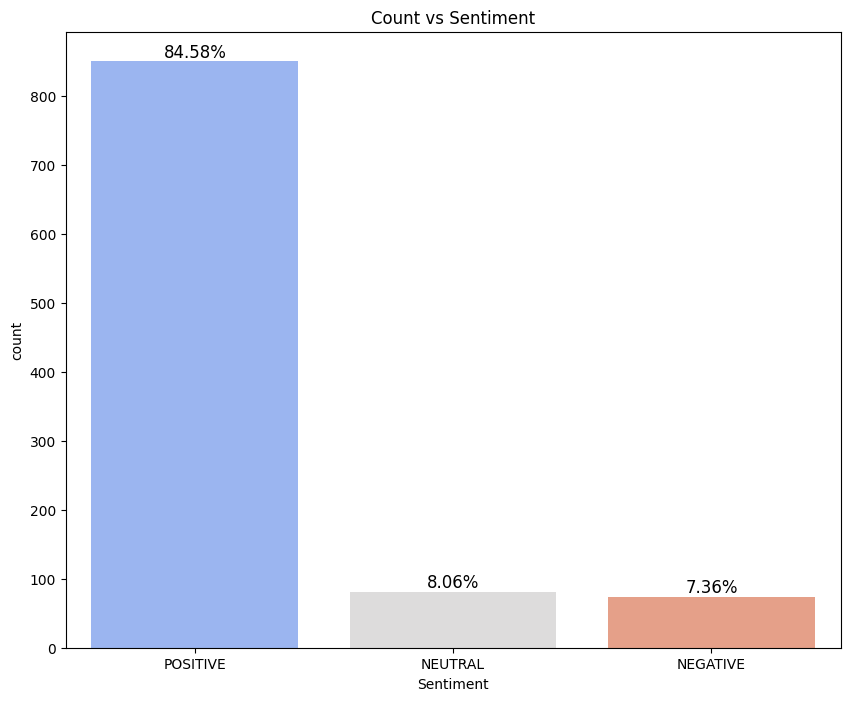

In [13]:
plt.figure(figsize=(10,8))
plt.title("Count vs Sentiment")
ax = sns.countplot(data=df, x='Sentiment', hue='Sentiment', palette='coolwarm')
total = len(df)
for p in ax.patches:
  percentage = f"{100 * p.get_height()/ total:.2f}%"
  ax.annotate(percentage,
              (p.get_x()+p.get_width()/2, p.get_height()), # position
              ha='center', va='bottom', fontsize=12, color='black'
              );

Observations:<br>
* Target class has three labels - Positive, Neutral, Negative
* The target class looks imbalanced

Text preprocessing

In [14]:
# remove special characters
import re

In [15]:
def remove_special_char(txt):
  patterns = r'[^a-zA-Z0-9]+'
  return re.sub(patterns, ' ',txt)

In [16]:
df['cleaned_text'] = df['Product Review'].apply(remove_special_char)

In [17]:
df.loc[0:3, ['Product Review', 'cleaned_text']]

,Product Review,cleaned_text
0,I initially had trouble deciding between the p...,I initially had trouble deciding between the p...
1,Allow me to preface this with a little history...,Allow me to preface this with a little history...
2,I am enjoying it so far. Great for reading. Ha...,I am enjoying it so far Great for reading Had ...
3,I bought one of the first Paperwhites and have...,I bought one of the first Paperwhites and have...


In [18]:
df['Product Review'].iloc[0]

"I initially had trouble deciding between the paperwhite and the voyage because reviews more or less said the same thing: the paperwhite is great, but if you have spending money, go for the voyage.Fortunately, I had friends who owned each, so I ended up buying the paperwhite on this basis: both models now have 300 ppi, so the 80 dollar jump turns out pricey the voyage's page press isn't always sensitive, and if you are fine with a specific setting, you don't need auto light adjustment).It's been a week and I am loving my paperwhite, no regrets! The touch screen is receptive and easy to use, and I keep the light at a specific setting regardless of the time of day. (In any case, it's not hard to change the setting either, as you'll only be changing the light level at a certain time of day, not every now and then while reading).Also glad that I went for the international shipping option with Amazon. Extra expense, but delivery was on time, with tracking, and I didnt need to worry about cu

In [19]:
df['cleaned_text'].iloc[0]

'I initially had trouble deciding between the paperwhite and the voyage because reviews more or less said the same thing the paperwhite is great but if you have spending money go for the voyage Fortunately I had friends who owned each so I ended up buying the paperwhite on this basis both models now have 300 ppi so the 80 dollar jump turns out pricey the voyage s page press isn t always sensitive and if you are fine with a specific setting you don t need auto light adjustment It s been a week and I am loving my paperwhite no regrets The touch screen is receptive and easy to use and I keep the light at a specific setting regardless of the time of day In any case it s not hard to change the setting either as you ll only be changing the light level at a certain time of day not every now and then while reading Also glad that I went for the international shipping option with Amazon Extra expense but delivery was on time with tracking and I didnt need to worry about customs which I may have 

In [20]:
# lowercasing
df['cleaned_text'] = df['cleaned_text'].str.lower()
df['cleaned_text'].iloc[0]

'i initially had trouble deciding between the paperwhite and the voyage because reviews more or less said the same thing the paperwhite is great but if you have spending money go for the voyage fortunately i had friends who owned each so i ended up buying the paperwhite on this basis both models now have 300 ppi so the 80 dollar jump turns out pricey the voyage s page press isn t always sensitive and if you are fine with a specific setting you don t need auto light adjustment it s been a week and i am loving my paperwhite no regrets the touch screen is receptive and easy to use and i keep the light at a specific setting regardless of the time of day in any case it s not hard to change the setting either as you ll only be changing the light level at a certain time of day not every now and then while reading also glad that i went for the international shipping option with amazon extra expense but delivery was on time with tracking and i didnt need to worry about customs which i may have 

In [21]:
# strip white spaces
df['cleaned_text'] = df['cleaned_text'].str.strip()
df['cleaned_text'].iloc[0]

'i initially had trouble deciding between the paperwhite and the voyage because reviews more or less said the same thing the paperwhite is great but if you have spending money go for the voyage fortunately i had friends who owned each so i ended up buying the paperwhite on this basis both models now have 300 ppi so the 80 dollar jump turns out pricey the voyage s page press isn t always sensitive and if you are fine with a specific setting you don t need auto light adjustment it s been a week and i am loving my paperwhite no regrets the touch screen is receptive and easy to use and i keep the light at a specific setting regardless of the time of day in any case it s not hard to change the setting either as you ll only be changing the light level at a certain time of day not every now and then while reading also glad that i went for the international shipping option with amazon extra expense but delivery was on time with tracking and i didnt need to worry about customs which i may have 

In [22]:
# remove stop words
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [23]:
def remove_stopwords(txt):
  stop_words = set(stopwords.words('english'))
  words = txt.split()
  filter_words = [word for word in words if word.lower() not in stop_words]
  return ' '.join(filter_words)

In [24]:
df['cleaned_text'] = df['cleaned_text'].apply(remove_stopwords)
df['cleaned_text'].iloc[0]

'initially trouble deciding paperwhite voyage reviews less said thing paperwhite great spending money go voyage fortunately friends owned ended buying paperwhite basis models 300 ppi 80 dollar jump turns pricey voyage page press always sensitive fine specific setting need auto light adjustment week loving paperwhite regrets touch screen receptive easy use keep light specific setting regardless time day case hard change setting either changing light level certain time day every reading also glad went international shipping option amazon extra expense delivery time tracking didnt need worry customs may used third party shipping service'

In [25]:
# stemming
from nltk.stem import PorterStemmer

In [26]:
# initalize the stemmer
ps = PorterStemmer()

In [27]:
def stemmed(txt):
  words = txt.split()
  stemmed_words = [ps.stem(word) for word in words]
  return ' '.join(stemmed_words)

In [28]:
df['cleaned_text'] = df['cleaned_text'].apply(stemmed)

In [29]:
df['cleaned_text'].iloc[0]

'initi troubl decid paperwhit voyag review less said thing paperwhit great spend money go voyag fortun friend own end buy paperwhit basi model 300 ppi 80 dollar jump turn pricey voyag page press alway sensit fine specif set need auto light adjust week love paperwhit regret touch screen recept easi use keep light specif set regardless time day case hard chang set either chang light level certain time day everi read also glad went intern ship option amazon extra expens deliveri time track didnt need worri custom may use third parti ship servic'

Split the dataset

In [30]:
X = df['cleaned_text']
y = df['Sentiment']

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.20, random_state=1)

In [33]:
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=.50, random_state=1)

In [34]:
print(f'Shape of Train dataset: {X_train.shape}')
print(f'Shape of Validation dataset: {X_val.shape}')
print(f'Shape of Test dataset: {X_test.shape}')

Shape of Train dataset: (804,)
Shape of Validation dataset: (100,)
Shape of Test dataset: (101,)


In [35]:
X_train.head()

,cleaned_text
350,excel daughter love read book school work watc...
981,work great origin deliveri date june juli upda...
424,pick portabl option play music garag love batt...
47,great look cover echo dot give dot softer eleg...
678,nice addit alexa famili pf product wireless mo...


In [36]:
print(f'Shape of Train dataset: {y_train.shape}')
print(f'Shape of Validation dataset: {y_val.shape}')
print(f'Shape of Test dataset: {y_test.shape}')

Shape of Train dataset: (804,)
Shape of Validation dataset: (100,)
Shape of Test dataset: (101,)


In [37]:
y_train.head()

,Sentiment
350,POSITIVE
981,POSITIVE
424,POSITIVE
47,POSITIVE
678,POSITIVE


Text Vectorization

In [38]:
# BOW and TF-IDF
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [39]:
# initialize the bow vectorizer
bow_vectorizer = CountVectorizer()
# fit on training data and tansform all the dataset
X_train_bow = bow_vectorizer.fit_transform(X_train)
X_val_bow = bow_vectorizer.transform(X_val)
X_test_bow = bow_vectorizer.transform(X_test)

In [40]:
# initialize the TF-IDF vectorize
tfidf_vectorizer = TfidfVectorizer()
# fit on training data and tansform all the dataset
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_val_tfidf = tfidf_vectorizer.transform(X_val)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [41]:
# Word2Vec model
from gensim.models import Word2Vec

In [42]:
# tokenize the sentences
X_train_tokens = [sentence.split() for sentence in X_train]
X_val_tokens = [sentence.split() for sentence in X_val]
X_test_tokens = [sentence.split() for sentence in X_test]

# train Wor2Vec model on the X_train_tokens
model_w2v = Word2Vec(sentences=X_train_tokens, vector_size=120, window=5, min_count=1, workers=6)

# generate word embeddings from the sentences
def get_sentence_embeddings(sentence, model):
  vectors = [model.wv[word] for word in sentence if word in model.wv]
  return np.mean(vectors, axis=0) if vectors else np.zeros(model.vector_size)

# transform the datasets
X_train_w2v = np.array([get_sentence_embeddings(sent, model_w2v) for sent in X_train_tokens])
X_val_w2v = np.array([get_sentence_embeddings(sent, model_w2v) for sent in X_val_tokens])
X_test_w2v = np.array([get_sentence_embeddings(sent, model_w2v) for sent in X_test_tokens])

In [43]:
# top 5 words similar to the word "book"
model_w2v.wv.similar_by_word("book", topn=5)

[('see', 0.999785304069519),
 ('read', 0.9997824430465698),
 ('back', 0.9997755885124207),
 ('want', 0.9997744560241699),
 ('devic', 0.9997692108154297)]

In [44]:
# computes the cosine similarity of the two words
model_w2v.wv.similarity("super", "good")

0.9990131

In [45]:
# Glove embedding
# extracting the glove words embeddings from the zip folder -> PS: the glove word embeddings are stord in the text file
# import zipfile

# zip_path = "/content/drive/MyDrive/Colab Notebooks/NLP/Week 2/glove.6B.zip"  # Update with your ZIP file path
# extract_path = "/content/drive/MyDrive/Colab Notebooks/NLP/Week 2/"  # Destination folder

# with zipfile.ZipFile(zip_path, 'r') as zip_ref:
#     zip_ref.extractall(extract_path)

# print("Extraction complete!")

In [46]:
# list of extracted files
# import os
# os.listdir(extract_path)

In [47]:
# load the pre-trained glove embeddings
glove_embedding = {}
path = '/content/drive/MyDrive/Colab Notebooks/NLP/Week 2/glove.6B.100d.txt'
with open(path, 'r', encoding='utf-8') as f:
  for line in f:
    values = line.split()
    word = values[0] # word
    vectors = np.asarray(values[1:], dtype='float32') # word embeddings of the word
    glove_embedding[word] = vectors # store the word embeddings along with word in dictionary

# toeknize the sentence
X_train_tokens = [sentence.split() for sentence in X_train]
X_val_tokens =  [sentence.split() for sentence in X_val]
X_test_tokens = [sentence.split() for sentence in X_test]

# generate word embeddings from the sentences
def get_sentence_embeddings_glove(sentence, embedding_dict, embedding_dim=100):
  vectors = [embedding_dict[word] for word in sentence if word in embedding_dict]
  return np.mean(vectors, axis=0) if vectors else np.zeros(embedding_dim)

# transform the dataset
X_train_glove = np.array([get_sentence_embeddings_glove(sent, glove_embedding) for sent in X_train_tokens])
X_val_glove = np.array([get_sentence_embeddings_glove(sent, glove_embedding) for sent in X_val_tokens])
X_test_glove = np.array([get_sentence_embeddings_glove(sent, glove_embedding) for sent in X_test_tokens])

In [48]:
# label encoder
from sklearn.preprocessing import LabelEncoder

In [49]:
# load the label encoder
encoder = LabelEncoder()

# encode the target class
y_train = encoder.fit_transform(y_train)
y_val = encoder.transform(y_val)
y_test = encoder.transform(y_test)

Model Building

In [50]:
from sklearn.ensemble import RandomForestClassifier

In [51]:
def get_accuracy(model, X_train, X_val, X_test):
  train_accuracy = model.score(X_train, y_train)
  val_accuracy = model.score(X_val, y_val)
  test_accuracy = model.score(X_test, y_test)
  return train_accuracy, val_accuracy, test_accuracy

model - simple random forest classifier

In [52]:
# random forset with bow vectorizer
model_rf = RandomForestClassifier(random_state=1)
model_rf.fit(X_train_bow, y_train)

RandomForestClassifier(random_state=1)

In [53]:
get_accuracy(model_rf, X_train_bow, X_val_bow, X_test_bow)

(1.0, 0.84, 0.8415841584158416)

In [54]:
# random forset with tf-idf vectorizer
model_rf_tfidf = RandomForestClassifier(random_state=1)
model_rf_tfidf.fit(X_train_tfidf, y_train)

RandomForestClassifier(random_state=1)

In [55]:
get_accuracy(model_rf_tfidf, X_train_tfidf, X_val_tfidf, X_test_tfidf)

(1.0, 0.82, 0.8217821782178217)

In [56]:
# random forset with word2vec vectorizer
model_rf_w2v = RandomForestClassifier(random_state=1)
model_rf_w2v.fit(X_train_w2v, y_train)

RandomForestClassifier(random_state=1)

In [57]:
get_accuracy(model_rf_w2v, X_train_w2v, X_val_w2v, X_test_w2v)

(1.0, 0.85, 0.8415841584158416)

In [58]:
# random forset with glove vectorizer
model_rf_glove = RandomForestClassifier(random_state=1)
model_rf_glove.fit(X_train_glove, y_train)

RandomForestClassifier(random_state=1)

In [59]:
get_accuracy(model_rf_glove, X_train_glove, X_val_glove, X_test_glove)

(0.9975124378109452, 0.85, 0.8415841584158416)

model - random forest classifier with class_weigth='balanced'

In [60]:
model_rf_bal = RandomForestClassifier(class_weight='balanced', random_state=1)
model_rf_bal.fit(X_train_bow, y_train)

RandomForestClassifier(class_weight='balanced', random_state=1)

In [61]:
get_accuracy(model_rf_bal, X_train_bow, X_val_bow, X_test_bow)

(1.0, 0.84, 0.8415841584158416)

In [62]:
model_rf_tfidf_bal = RandomForestClassifier(class_weight='balanced', random_state=1)
model_rf_tfidf_bal.fit(X_train_tfidf, y_train)

RandomForestClassifier(class_weight='balanced', random_state=1)

In [63]:
get_accuracy(model_rf_tfidf_bal, X_train_tfidf, X_val_tfidf, X_test_tfidf)

(1.0, 0.83, 0.8415841584158416)

In [64]:
model_rf_w2v_bal = RandomForestClassifier(class_weight='balanced', random_state=1)
model_rf_w2v_bal.fit(X_train_w2v, y_train)

RandomForestClassifier(class_weight='balanced', random_state=1)

In [65]:
get_accuracy(model_rf_w2v_bal, X_train_w2v, X_val_w2v, X_test_w2v)

(1.0, 0.85, 0.8415841584158416)

In [66]:
model_rf_glove_bal = RandomForestClassifier(class_weight='balanced', random_state=1)
model_rf_glove_bal.fit(X_train_glove, y_train)

RandomForestClassifier(class_weight='balanced', random_state=1)

In [67]:
get_accuracy(model_rf_glove_bal, X_train_glove, X_val_glove, X_test_glove)

(0.9975124378109452, 0.85, 0.8415841584158416)

model - hyperparamter tuning

In [68]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [69]:
param_grid = {
              'n_estimators': [100, 200, 300],  # Number of trees
    'max_depth': list(np.arange(4, 15, 2)),  # Controls tree depth
    'min_samples_split': [2, 5, 10],  # Minimum samples to split a node
    'min_samples_leaf': [1, 2, 4],  # Minimum samples per leaf node
    'max_features': ['sqrt', 'log2'],  # Number of features to consider for each split
    'bootstrap': [True, False]  # Whether to use bootstrap sampling
}

rs = RandomizedSearchCV(RandomForestClassifier(random_state=1), param_grid, cv=3, n_jobs=-1)

In [70]:
model_bow = rs.fit(X_train_bow, y_train)

In [71]:
best_params = model_bow.best_params_
best_params

{'n_estimators': 300,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'log2',
 'max_depth': 14,
 'bootstrap': True}

In [72]:
model_rf_tuned = RandomForestClassifier(**best_params, random_state=1)
model_rf_tuned.fit(X_train_bow, y_train)

RandomForestClassifier(max_depth=14, max_features='log2', min_samples_split=5,
                       n_estimators=300, random_state=1)

In [73]:
get_accuracy(model_rf_tuned, X_train_bow, X_val_bow, X_test_bow)

(0.8656716417910447, 0.83, 0.8217821782178217)

In [74]:
model_tfidf = rs.fit(X_train_tfidf, y_train)

In [75]:
best_params = model_tfidf.best_params_
best_params

{'n_estimators': 200,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 12,
 'bootstrap': False}

In [76]:
model_rf_tfidf_tuned = RandomForestClassifier(**best_params, random_state=1)
model_rf_tfidf_tuned.fit(X_train_tfidf, y_train)

RandomForestClassifier(bootstrap=False, max_depth=12, n_estimators=200,
                       random_state=1)

In [77]:
get_accuracy(model_rf_tfidf_tuned, X_train_tfidf, X_val_tfidf, X_test_tfidf)

(0.8992537313432836, 0.84, 0.8316831683168316)

In [78]:
model_w2v_tuned = rs.fit(X_train_w2v, y_train)

In [79]:
best_params = model_w2v_tuned.best_params_
best_paramsbest_params = model_w2v_tuned.best_params_
best_params

{'n_estimators': 200,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 8,
 'bootstrap': True}

In [80]:
model_rf_w2v_tuned = RandomForestClassifier(**best_params, random_state=1)
model_rf_w2v_tuned.fit(X_train_w2v, y_train)

RandomForestClassifier(max_depth=8, min_samples_split=5, n_estimators=200,
                       random_state=1)

In [81]:
get_accuracy(model_rf_w2v_tuned, X_train_w2v, X_val_w2v, X_test_w2v)

(0.8967661691542289, 0.82, 0.8217821782178217)

In [82]:
model_glove_tuned = rs.fit(X_train_glove, y_train)

In [83]:
best_params = model_glove_tuned.best_params_
best_params

{'n_estimators': 100,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'log2',
 'max_depth': 14,
 'bootstrap': False}

In [84]:
model_rf_glove_tuned = RandomForestClassifier(**best_params, random_state=1)
model_rf_glove_tuned.fit(X_train_glove, y_train)

RandomForestClassifier(bootstrap=False, max_depth=14, max_features='log2',
                       min_samples_leaf=2, min_samples_split=5, random_state=1)

In [85]:
get_accuracy(model_rf_glove_tuned, X_train_glove, X_val_glove, X_test_glove)

(0.9975124378109452, 0.85, 0.8415841584158416)

In [86]:
models = {model_rf: [X_train_bow, X_test_bow],
          model_rf_tfidf: [X_train_tfidf, X_test_tfidf],
          model_rf_w2v: [X_train_w2v, X_test_w2v],
          model_rf_glove: [X_train_glove, X_test_glove],
          model_rf_bal: [X_train_bow, X_test_bow],
          model_rf_tfidf_bal: [X_train_tfidf, X_test_tfidf],
          model_rf_w2v_bal: [X_train_w2v, X_test_w2v],
          model_rf_glove_bal: [X_train_glove, X_test_glove],
          model_rf_tuned: [X_train_bow, X_test_bow],
          model_rf_tfidf_tuned: [X_train_tfidf, X_test_tfidf],
          model_rf_w2v_tuned: [X_train_w2v, X_test_w2v],
          model_rf_glove_tuned: [X_train_glove, X_test_glove],
          }



train_acc = [model.score(acc[0], y_train) for model,acc in models.items()]
test_acc = [model.score(acc[1], y_test) for model,acc in models.items()]
df_all = pd.DataFrame([train_acc, test_acc], index=['Train accuracy', 'Test accuracy'],
                  columns = ['Random Forest bow', 'Random Forest Tf-IDF', 'Random Forest Word2vec', 'Random Forest glove',
                             'Random Forest bow bal', 'Random Forest Tf-IDF bal', 'Random Forest Word2vec bal', 'Random Forest glove bal',
                             'Random Forest bow tuned', 'Random Forest Tf-IDF tuned', 'Random Forest Word2vec tuned', 'Random Forest glove tuned']
                  )
df_all.T

,Train accuracy,Test accuracy
Random Forest bow,1.000000,0.841584
Random Forest Tf-IDF,1.000000,0.821782
Random Forest Word2vec,1.000000,0.841584
Random Forest glove,0.997512,0.841584
Random Forest bow bal,1.000000,0.841584
Random Forest Tf-IDF bal,1.000000,0.841584
Random Forest Word2vec bal,1.000000,0.841584
Random Forest glove bal,0.997512,0.841584
Random Forest bow tuned,0.865672,0.821782
Random Forest Tf-IDF tuned,0.899254,0.831683


Inference

In [87]:
# pre-processing
def pre_process(txt):
  # remove speical characters
  patterns = r'[^a-zA-Z0-9]+'
  txt = re.sub(patterns, ' ', txt)

  # lowercase
  txt = txt.lower()

  # strip whitespaces
  txt = txt.strip()

  # remove stopwords
  stop_words = set(stopwords.words('english'))
  words = txt.split()
  filter_words = [word for word in words if word not in stop_words]
  txt = ' '.join(filter_words)

  # stemming
  ps = PorterStemmer()
  words = txt.split()
  stem_words = [ps.stem(word) for word in words]
  txt = ' '.join(stem_words)
  return txt

In [88]:
sample_text = "Negativity product"
text = pre_process(sample_text)
text

'neg product'

In [89]:
text_tokens = text.split()  # Tokenize

# Function to get sentence embedding using GloVe
def get_glove_embedding(text_tokens, glove_embedding, embedding_dim=100):
    word_vectors = [glove_embedding[word] for word in text_tokens if word in glove_embedding]
    return np.mean(word_vectors, axis=0) if word_vectors else np.zeros(embedding_dim)

# Convert text to GloVe vector
sentence_embedding = get_glove_embedding(text_tokens, glove_embedding)

print("GloVe Sentence Embedding:", sentence_embedding)

GloVe Sentence Embedding: [ 0.095735    0.17269585 -0.07451001 -0.28085902 -0.27491248 -0.778005
  0.57578003 -0.25848     0.1271145   0.07334001 -0.0256455  -0.34120348
 -0.037856   -0.1182056   0.170895    0.22187799  0.15090498  0.40927202
  0.33881998  0.1372345  -0.17746751 -0.179588    0.00282     0.2458975
 -0.08629     0.303695    0.596195    0.21206498 -0.51423    -0.2791375
  0.303205    0.573       0.27925602 -0.367515    0.279585    0.26777
  0.24836    -0.1487125  -0.520005   -0.361235    0.31859    -0.07311499
 -0.1185935   0.0067535  -0.08974101  0.11644749 -0.374525    0.034935
 -0.394895   -0.35585     0.285822    0.1965075  -0.167965    0.50875
  0.119947   -0.29415     0.06769502  0.3244135   0.84533995 -0.172785
  0.45266998 -0.26312    -0.156648    0.180005    0.342615    0.2942905
  0.183445   -0.1360045   0.17732999 -0.19166501  0.104773    0.197625
 -0.133876    0.1011726   0.142709   -0.27917254 -0.04716    -0.269875
 -0.03598     0.048995    0.01171    -0.3422

In [90]:
predicted_class = model_rf_glove_tuned.predict(sentence_embedding.reshape(1,-1))
predicted_class

array([2])

In [91]:
# Convert numerical prediction back to original label
predicted_label = encoder.inverse_transform([predicted_class[0]])

print("Predicted Sentiment:", predicted_label[0])

Predicted Sentiment: POSITIVE


In [93]:
import pickle

drive_path = "/content/drive/MyDrive/Colab Notebooks/NLP/Week 2/sentiment_model.pkl"
# Save your trained model
with open(drive_path, "wb") as f:
    pickle.dump(model_rf_glove_tuned, f)

print("Model saved successfully!")

Model saved successfully!
